In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Non-linear Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics to evaluate performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./anemiaDataset.csv')
df.head(10)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0,8.88,38.37,39.64,71.17,1
1,1,10.34,26.27,37.24,78.18,1
2,0,11.33,29.23,35.54,80.03,0
3,1,16.55,27.12,34.12,91.35,0
4,0,10.40,23.32,38.49,105.46,1
5,1,18.59,21.38,32.55,101.33,1
6,0,12.27,31.41,34.22,99.17,0
7,1,16.72,28.25,35.20,82.39,0
8,0,5.98,10.60,40.10,101.51,1
9,1,6.52,38.49,36.16,50.51,1


In [3]:
# Check if there is any missing value
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [4]:
# Check data types of each columns
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

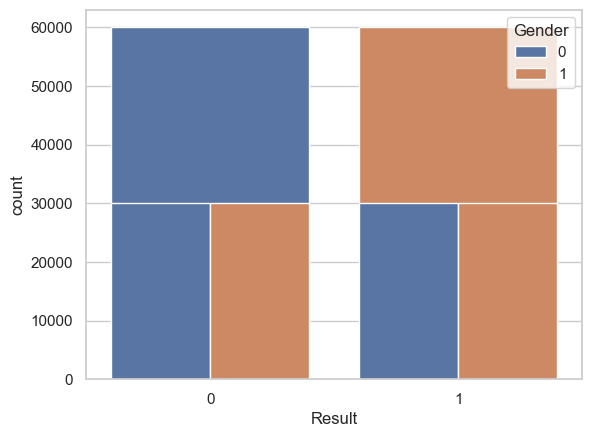

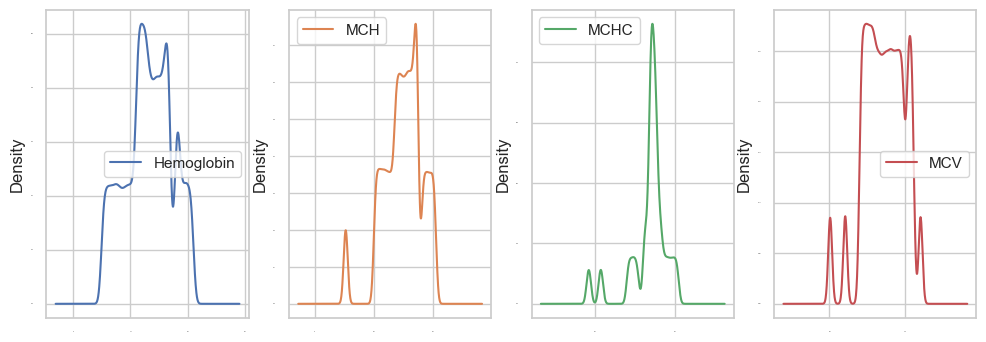

In [5]:
# Check data types of each columns
df.dtypes

# Convert Gender and Result into objects
df[['Gender', 'Result']] = df[['Gender', 'Result']].astype('category')
cat_features = ['Gender', 'Result'] # Categorical columns(features)
nbr_features = df.columns.drop(cat_features) # Numerical columns(features)
df.dtypes

# Description of the dataset
pd.set_option('display.precision', 1)
df.describe(include='all')


# Check if the dataset is balanced
sb.countplot(x=df['Result'])

sb.countplot(x=df['Result'], hue=df['Gender'])

# Check the distribution of the numeric values
df[nbr_features].plot(kind='density', subplots=True, layout=(1,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(12,4))
plt.show()

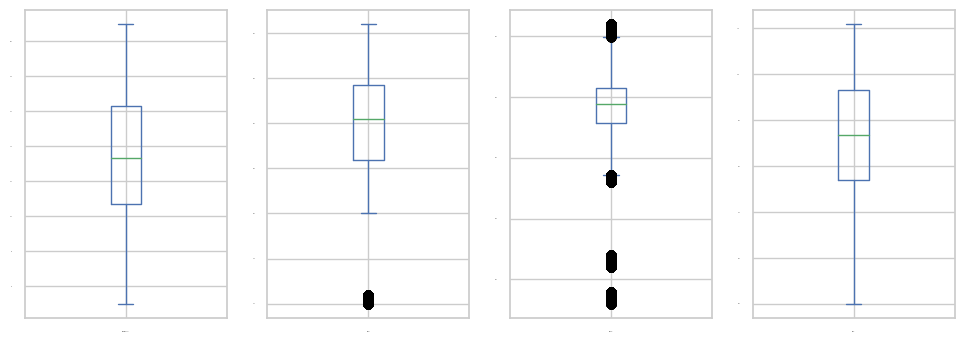

In [6]:
# Check if there is any outlier values in any of the features
df[nbr_features].plot(kind='box', subplots=True, layout=(1,4), sharex=False, legend=True,
                     fontsize=1, figsize=(12,4))
plt.show()

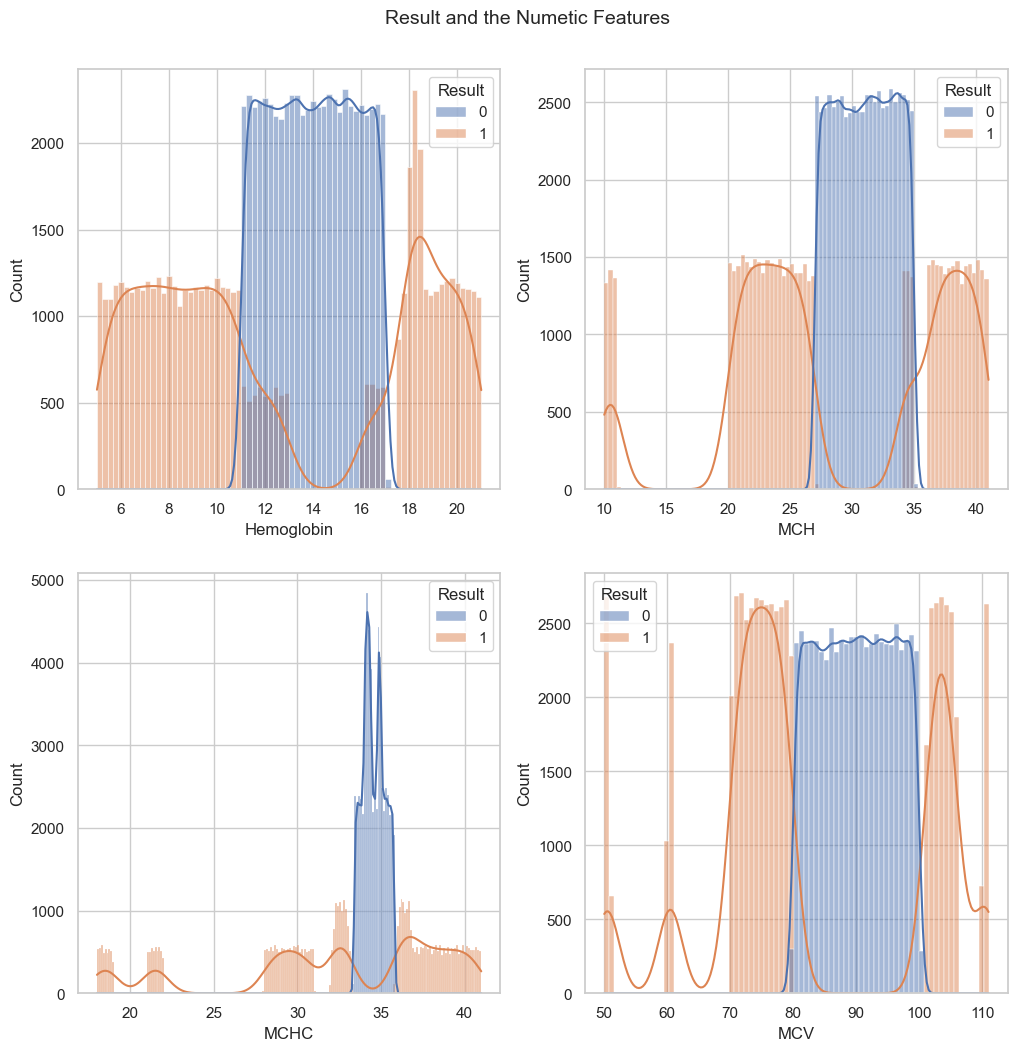

In [7]:
# Let's try to findout the relation between the Result and the numeric features
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sb.histplot(data=df, x=df['Hemoglobin'], hue=df['Result'], kde=True, ax=ax[0,0])
sb.histplot(data=df, x=df['MCH'], hue=df['Result'], kde=True, ax=ax[0,1])
sb.histplot(data=df, x=df['MCHC'], hue=df['Result'], kde=True, ax=ax[1,0])
sb.histplot(data=df, x=df['MCV'], hue=df['Result'], kde=True, ax=ax[1,1])
fig.suptitle('Result and the Numetic Features', fontsize=14, y=0.93)
plt.show()

In [8]:
x = df.drop('Result', axis=1)
y = df['Result']
test_size = 0.2
seed = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)


In [9]:
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
# print(ran_pred)
accuracy_scorerf = accuracy_score(y_test, svm_pred)
print("SVM :", accuracy_scorerf)

SVM : 1.0


In [10]:
new_patients = {'Gender':[0,1,1,1,0,1],
                'Hemoglobin':[6.9,11.8,11,11,10.7,16.2],
                'MCH': [28.1,16.3,26,25.2,21.3,17.2],
                'MCHC': [32.5,30.9,32.2,30.9,29.1,32.2],
                'MCV' : [94.6,78.7,98.9,83.2,78.7,78.4]}
df2 = pd.DataFrame(new_patients,columns=['Gender','Hemoglobin','MCH','MCHC','MCV'])
y_pred=svm.predict(df2)
df2['Predicted Result'] = y_pred
print (df2)

   Gender  Hemoglobin   MCH  MCHC   MCV  Predicted Result
0       0         6.9  28.1  32.5  94.6                 1
1       1        11.8  16.3  30.9  78.7                 1
2       1        11.0  26.0  32.2  98.9                 1
3       1        11.0  25.2  30.9  83.2                 1
4       0        10.7  21.3  29.1  78.7                 1
5       1        16.2  17.2  32.2  78.4                 1


In [11]:
import pickle
pickle.dump(svm, open('svm.pkl', 'wb'))


In [12]:
# Loading model
loaded_model = pickle.load(open('svm.pkl', 'rb'))


In [13]:
result = loaded_model.score(x_test,y_test)
print(result)

1.0
